## Question 2.1
> Desribe a situation or problem from your job, everyday life, current events, etc., for which a classification model would be appropriate. List some (up to 5) predictors that you might use.

In K-12 education educators are responsible for helping to identify students that potentially have a learning disability. Some potential predictors could be:
1. Verbal language ability (could use various language tests already given depending on age)
2. Math ability (using standardized tests)
3. Reading/Writing ability (using standardized tests)
4. Academic performance (grades disaggregated by subject and viewed over time)
5. Attendance
6. Parents highest level of education
7. Known medical issues
8. Academic background (access to education in the past)

## Question 2.2
> The files credit_card_data.txt (without headers) and credit_card_data-headers.txt (with headers) contain a dataset with 654 data points, 6 continuous and 4 binary predictor variables.  It has anonymized credit card applications with a binary response variable (last column) indicating if the application was positive or negative. The dataset is the “Credit Approval Data Set” from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) without the categorical variables and without data points that have missing values.)


#### Install Libraries
This question needs the kernlab and kknn libraries

In [21]:
library(kernlab)
library(kknn)
library(vtable)
library(htmltools)
suppressWarnings(library(ggplot2))

#### Load Data
The data set was provided in the homework .zip folder and I am choosing to use the data that includes headers so they are available to reference

In [2]:
data <- read.table("credit_card_data-headers.txt", header = TRUE)

#### Examine Data
Now that the data is loaded I want to examine it to get a better idea of what it looks like. I'm interested in actually seeing the data but also infomration about the data such as data type and ranges of values.

In [3]:
# Output the data class for each column transposed
t(sapply(data, class))

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
integer,numeric,numeric,numeric,integer,integer,integer,integer,integer,integer,integer


In [4]:
# Look at the first and last few rows of the data
head(data)
tail(data)

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
649,1,40.58,3.290,3.50,0,1,0,0,400,0,0
650,1,21.08,10.085,1.25,0,1,0,1,260,0,0
651,0,22.67,0.750,2.00,0,0,2,0,200,394,0
652,0,25.25,13.500,2.00,0,0,1,0,200,1,0
653,1,17.92,0.205,0.04,0,1,0,1,280,750,0
654,1,35.00,3.375,8.29,0,1,0,0,0,0,0


In [5]:
# Output the range of all the values for each column as a table
t(sapply(data, range))

A1,0.00,1.00
A2,13.75,80.25
A3,0.00,28.00
A8,0.00,28.50
A9,0.00,1.00
A10,0.00,1.00
A11,0.00,67.00
A12,0.00,1.00
A14,0.00,2000.00
A15,0.00,100000.00
R1,0.00,1.00


In [6]:
# Check that the R1 column only contains 1 and 2 and output a summary table (doesn't show in notebook)
unique(data$R1)
sumtable(data)

[1] 1 0

In [7]:
# Double check size of the data
cat('Rows',' ','Columns')
t(dim(data))

Rows   Columns

654,11


This lets me know that I have a table with 654 rows and 11 columns (10 attributes and one result). The data is a combination of integer and float (numeric) values with A1, A9, A10, A12, and R1 being categorical (1 or 0). Looking at the UC Irvine website linked above, they list information about the dataset and I can see that our dataset has been cleaned. Missing values have been removed, categorical variables with more than 2 categories have been dropped, and categories have been turned into numerical values (1 or 0). It's also important to note the wide range in values that some of our attributes possess, meaning scaling will be important. I also know that this dataset is being using to determine credit approval for credit card applications.

### SVM Classification
Next I am going to fit the data with a SVM model and test to see how well it predicts credit approval. I want to look a range of C (NOT lambda but has similar effect in our model) values and determine which value will be a best fit for the model. It's important to note that the higher the lambda the more weight we put on creating a larger margin and the less weight we put on minimizing errors but that C is the inverse of that. I'm also interested in trying different kernals to see how they change the results which is described as optional question #2 so will include that as well.

In [8]:
C_values <- c(.000000001, .00000001, .0000001, .000001, .00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000)
kernal_values <- c("vanilladot", "rbfdot", "polydot", "tanhdot", "laplacedot", "besseldot", "anovadot", "splinedot")

I want to save the results of the various C values and kernals to a dataframe that I can call after testing all the models.

In [9]:
results_df <- data.frame('C_Value' = numeric(), 'Kernal_Name' = character(), 'Accuracy' = numeric(), stringsAsFactors = FALSE)

Next I will loop through the various C values and kernals training our model on the data with those inputs. Then I will test the accuracy of the model in predicting credit approval for further analysis.

In [10]:
for (kern_val in kernal_values) {
    for (C_val in C_values) {
    	vsm_model <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]),type="C-svc",kernel=kern_val,C=C_val,scaled=TRUE)
    	pred <- predict(vsm_model,data[,1:10])
    	accuracy <- round((sum(pred == data[,11]) / nrow(data))*100,4)
        results_df <- rbind(results_df, data.frame(C_Value = C_val, Kernal_Name = kern_val, Accuracy = accuracy))
    }
}

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 

The entire results data frame is printed below so I can get an idea of how our various C values and kernals did at predicting credit card approval for our given dataset. I did not include the entire output to keep the homework submission from becoming to lengthy. I will use this infromation to answer questsion 2.2 - Part 1 and 2.2 - Part 2 below.

In [11]:
results_df

C_Value,Kernal_Name,Accuracy
1e-09,vanilladot,54.7401
1e-08,vanilladot,54.7401
1e-07,vanilladot,54.7401
1e-06,vanilladot,54.7401
1e-05,vanilladot,54.7401
1e-04,vanilladot,54.7401
1e-03,vanilladot,83.7920
1e-02,vanilladot,86.3914
1e-01,vanilladot,86.3914
1e+00,vanilladot,86.3914


### KNN Classification
Next I am going to fit our data with a KNN model and test to see how well it predicts credit approval. I have to determine a good value of k which defines how many neighbors will be compared to determine the classification of the point. The equation I am going to train it on is:

\\[R1 ~= f(A1, A2, A3, A8, A9, A10, A12, A14, A15)\\]

I am going to use Leave-One-Out Cross-Validation (LOOCV). This is done by leaving out a single data point dataset and then training the model with the remaining data points. The removed data point is then used as a test case to evaluate the model's performance. For each of the k values we want to test we will loop through each row of data, using that row to test our model and using all of the rest of the data to use as neighbors. I am going to use loops to accomplish this but I found that using the train.kknn() function is another option as it also uses the LOOCV method. For the purpose of this homework to get practice using loops in R I am not using the train.kknn() option.

In [12]:
k_len = 60
knn_results_df <- data.frame('k_value' = numeric(), 'Accuracy' = numeric(), stringsAsFactors = FALSE)

for (k_val in 1:k_len) {
    knn_prediction <- array(0, nrow(data))
    for (i in 1:nrow(data)) {
        train_data <- data[-i,]
    	test_data <- data[i,]
    	knn_model = kknn(as.factor(R1)~., train_data, test_data, k=k_val, scale = TRUE)
        knn_prediction[i] <- predict(knn_model)
    }
    # Subtracting 1 from knn_prediction b/c it gives 1 and 2 instead of 0 and 1 as result
    knn_accuracy <- 100 * sum(data[,11] == knn_prediction-1)/nrow(data)
    knn_results_df <- rbind(knn_results_df, data.frame('k_value' = k_val, 'Accuracy' = knn_accuracy))
}

Now that I have the results of our various knn models with k values of 1-60 in our knn_results_df, I will use that to determine the answer to question 2.2 - Part 3 below.

### Answer to Question 2 - Part 1
Part 1 asked to find a good classifier for the data using the SVM function ksvm and the kernal VannillaDot. As can be seen from the results_df shown above and the graph below, our model achieved 86.39% accuracy in predicting credit card approval for the data set with multiple C values (.01, 1, 10, 100, 100000). I will choose **0.01 as our C value for the answer to this question.** The reason for this selection, equation for the choosen classifier, and the results of it's predictions can be found below.

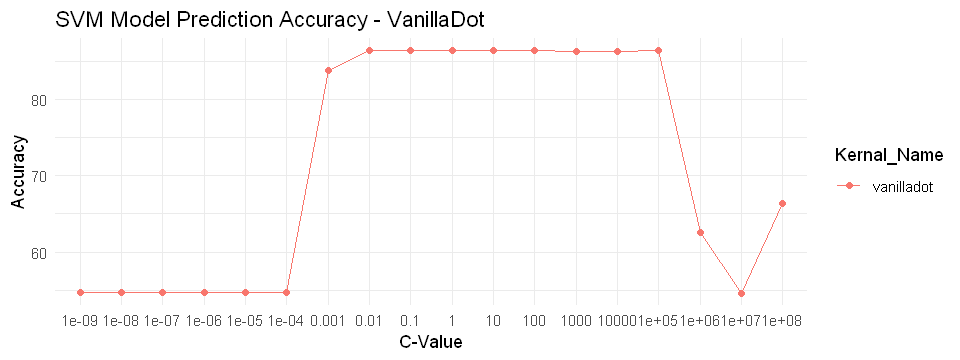

In [13]:
# Plot the values from the results_df for just the vanilladot kernal)
desired_kernels <- c("vanilladot")

options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(data = subset(results_df, Kernal_Name %in% desired_kernels), aes(x = factor(C_Value), y = Accuracy, color = Kernal_Name, group = Kernal_Name)) +
  geom_point() + 
  geom_line() +
  labs(x = "C-Value", y = "Accuracy", title = "SVM Model Prediction Accuracy - VanillaDot") +
  theme_minimal()

I chose **0.01 as my C-value** for the classifier, which matched an **accuracy of 86.3914%** with serveral other C-values. I choose to use the smaller C value because it puts a larger emphasis on increasing the margin. Depending on the cost value of a mistake for approving a credit card this may or may not be appropriate, but based on how easy it is to be approved for a credit card my assumption is that issuers side more liberally on approval. Rerunning the model I get the predicted values vs. the actual values and the coefficients for our models equation.

In [14]:
# Rerun the model and save the results and coefficients of the model
vsm_model <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]),type="C-svc",kernel="vanilladot",C=0.01,scaled=TRUE)
a <- colSums(vsm_model@xmatrix[[1]] * vsm_model@coef[[1]])
a0 <- -vsm_model@b
pred <- predict(vsm_model,data[,1:10])
accuracy <- round((sum(pred == data[,11]) / nrow(data))*100,4)

# Compare predicted values to actual values to get a sense of how our model looks
prediction_df <- data.frame('Predicted_Values' = pred, 'Actual_Values' = data[,11], stringsAsFactors = FALSE)
cat('Example of output from model, full results inspected but not shown to keep response to managable length:')
head(prediction_df)

 Setting default kernel parameters  
Example of output from model, full results inspected but not shown to keep response to managable length:

Predicted_Values,Actual_Values
1,1
1,1
1,1
1,1
1,1
1,1


The equation for the model can be seen below, the coefficients were rounded to show the entire equation. The coeficients full values can be found below in the output of the next cell.

\\[(-0.0002X_{i1} - 0.0015X_{i2} + 0.0014X_{i3} + 0.0073X_{i8} + 0.9916X_{i9} - 0.0045X_{i10} + 0.0071X_{i11} - 0.0005X_{i12} - 0.0017X_{i14} +  0.1055X_{i15} + 0.0820) Y_{i} \ge 1\\]

In [15]:
cat("With a C-Value of 0.01 our model correctly predicted ", accuracy, "% of the outcomes for the datatset. The coefficients for the model are shown below:", "\n")
cat("a =", a, "\n")
cat("a0 =", a0, "\n")

With a C-Value of 0.01 our model correctly predicted  86.3914 % of the outcomes for the datatset. The coefficients for the model are shown below: 
a = -0.0001500738 -0.001481829 0.001408313 0.007286389 0.991647 -0.004466124 0.00714829 -0.0005468386 -0.001693058 0.1054824 
a0 = 0.08198854 


### Answer to Question 2.2 - Part 2
For Part 2 I looked at the 6 different kernals listed in the R documentation on the ksvm function (https://www.rdocumentation.org/packages/kernlab/versions/0.9-32/topics/ksvm). Looking at the results of the various kernal types in the dataframe shown above and the graph below, two models reach 100% accuracy (rbfdot, laplacedot). **The laplacedot kernal saw a 100% prediction over a wider range of C values** (100 - 100000000) than the rbfdot which got all of it's prediction correct only at the largest two C values. This gives laplacedot the slight edge but both proved to correctly predict 100% of the credit card approvals at the right C value.

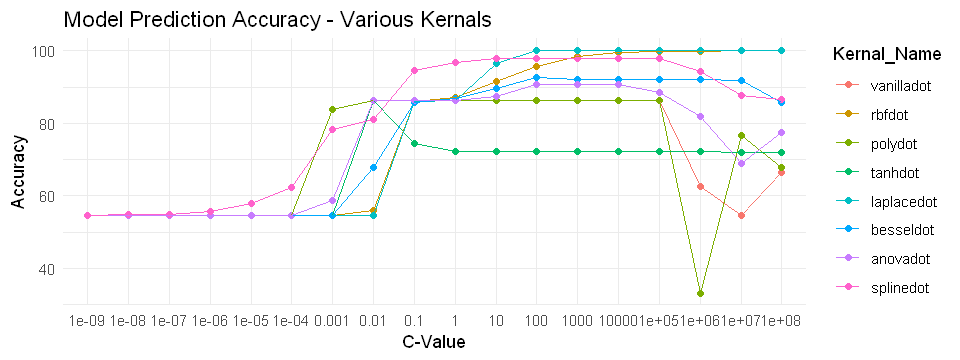

In [16]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(data = results_df, aes(x = factor(C_Value), y = Accuracy, color = Kernal_Name, group = Kernal_Name)) +
  geom_point() + 
  geom_line() +
  labs(x = "C-Value", y = "Accuracy", title = "Model Prediction Accuracy - Various Kernals") +
  theme_minimal()

### Answer to Question 2.2 - Part 3
For part 3 I am using the k-nearest-neighbors classification function kknn contained in the R kknn package to come up with a good value of k, and then showing how well it classifies data points in the full data set. I ran the model for a range of 1:40 k-values and found that the most accurate model used a **k-value of 12** which **correctly predicted 85.21%** of the results. A graph of the k-values vs. their accuracy can be seen below as well as the maximum accuracy value and corresponding k-value from our knn_results_df dataframe.

Maximum Accuracy value: 85.3211 
Corresponding k-value: 12 


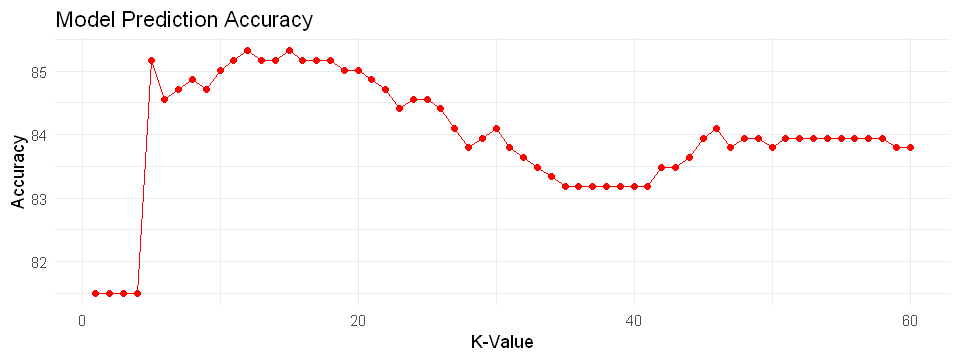

In [17]:
# Create a graph of k-values vs. accuracy
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(data = knn_results_df, aes(x = k_value, y = Accuracy)) +
  geom_point(color = "red") + 
  geom_line(color = "red") +
  labs(x = "K-Value", y = "Accuracy", title = "Model Prediction Accuracy") +
  theme_minimal()

# Find the row index with the maximum Accuracy and the corresponding K-Value
max_index <- which.max(knn_results_df$Accuracy)
max_k_value <- knn_results_df$k_value[max_index]
max_accuracy <- knn_results_df$Accuracy[max_index]

# Print the results
cat("Maximum Accuracy value:", max_accuracy, "\n")
cat("Corresponding k-value:", max_k_value, "\n")